Downloading the data from kaggle API

In [4]:
!wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/27923/3495119/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1673129599&Signature=Qnqv6lKODrjvQIN5E01cpdDRq66XMpR9%2BwTW8xoSw3XZOqfGJeQgqPhkK2%2F5kC19fxOjekOab8ehe%2BWEXhbE5dJuoWPDV5UsciSLux%2BkfoxP6uPGseI%2Bx%2FACuZbgc%2BNMx9U8uta8GbpEWIerO3bdlHzJHMK6J%2B%2B4E7sEH5O%2Fj0AbjlcVPPsrXOBs0D5jnptP%2Fja69nG3hr4vnamCgdepZ1AUYMxXgCpK60yjaMFjvfmdB6vFhoyrkyTxn0RHuQUdwh33arXWsbCrZfr023m8iGUwOOCqDGyDjXbBvWX6XQGtIh1Nk0ZDKKl626gJFzB9NY9w%2BbJ2VFWUDCbEqYG3%2Bg%3D%3D&response-content-disposition=attachment%3B+filename%3Duw-madison-gi-tract-image-segmentation.zip' 

The name is too long, 548 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1673129599&Signature=Qnqv6lKODrjvQIN5E01cpdDRq66XMpR9+wTW8xoSw3XZOqfGJeQgqPhkK2%2F5kC19fxOjekOab8ehe+WEXhbE5dJuoWPDV5UsciSLux+kfoxP6uPGseI+x%2FACuZbgc+NMx.
--2023-01-04 22:19:06--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/27923/3495119/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1673129599&Signature=Qnqv6lKODrjvQIN5E01cpdDRq66XMpR9%2BwTW8xoSw3XZOqfGJeQgqPhkK2%2F5kC19fxOjekOab8ehe%2BWEXhbE5dJuoWPDV5UsciSLux%2BkfoxP6uPGseI%2Bx%2FACuZbgc%2BNMx9U8uta8GbpEWIerO3bdlHzJHMK6J%2B%2B4E7sEH5O%2Fj0AbjlcVPPsrXOBs0D5jnptP%2Fja69nG3hr4vnamCgdepZ1AUYMxXgCpK60yjaMFjvfmdB6vFhoyrkyTxn0RHuQUdwh33arXWsbCrZfr023m8iGUwOOCqDGyDjXbBvWX6XQGtIh1Nk0ZDKKl626gJFzB9NY9w%2BbJ2VFWUDCbEqYG3%2Bg%3D%3D&response-content-disposition=attachment%3B+filename%3Duw-madison-gi-tract-image-segmentation.zip
Res

In [ ]:
!unzip '/content/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1673129599&Signature=Qnqv6lKODrjvQIN5E01cpdDRq66XMpR9+wTW8xoSw3XZOqfGJeQgqPhkK2%2F5kC19fxOjekOab8ehe+WEXhbE5dJuoWPDV5UsciSLux+kfoxP6uPGseI+x%2FACuZbgc+NMx'

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import tensorflow.keras as keras
import os

In [6]:
df=pd.read_csv('/content/train.csv')

In [7]:
#check if the mask is nan
def isNaN(num):
    return num!= num

In [9]:
#find the string in the text
def find_string(txt, str1):
    return txt.find(str1, txt.find(str1)+1)

In [10]:
#Dividing the class column into 3 lists
days=[]
slices=[]
large_bowel=[]
small_bowel=[]
stomach=[]
cases=[]
for j in range(0,115488,3):
    cases.append(df['id'][j][0:df['id'][j].index('_')])
    days.append(df['id'][j][df['id'][j].index('d'):find_string(df['id'][j],('_'))])
    slices.append(df['id'][j][find_string(df['id'][j],('s'))::])
for k in range(115488):
    if(df['class'][k]=='large_bowel'):
        large_bowel.append(df['segmentation'][k])

    if(df['class'][k]=='small_bowel'):
        small_bowel.append(df['segmentation'][k])

    if(df['class'][k]=='stomach'):
        stomach.append(df['segmentation'][k])

Creating new dataFrame

In [11]:
df2=0

In [12]:
df2=pd.DataFrame(np.array(days),columns =["Days"])

In [13]:
df2.insert(1,'Slices',slices,True)

In [14]:
df2.insert(2,'Stomach',stomach,True)

In [15]:
df2.insert(3,'Small_bowel',small_bowel,True)

In [16]:
df2.insert(4,'Large_bowel',large_bowel,True)

In [17]:
df2.insert(5,'Cases',cases,True)

In [18]:
df2

,Days,Slices,Stomach,Small_bowel,Large_bowel,Cases
0,day20,slice_0001,NaN,NaN,NaN,case123
1,day20,slice_0002,NaN,NaN,NaN,case123
2,day20,slice_0003,NaN,NaN,NaN,case123
3,day20,slice_0004,NaN,NaN,NaN,case123
4,day20,slice_0005,NaN,NaN,NaN,case123
...,...,...,...,...,...,...
38491,day0,slice_0140,NaN,NaN,NaN,case30
38492,day0,slice_0141,NaN,NaN,NaN,case30
38493,day0,slice_0142,NaN,NaN,NaN,case30
38494,day0,slice_0143,NaN,NaN,NaN,case30


In [70]:
def rle_decode(iter_checker1, iter_checker2, iter_checker3, shape1,shape2):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    
    '''
    img = np.zeros(shape=(shape1*shape2,1), dtype=np.uint8)
#iter_checker is for stomach
    if(iter_checker1!=0):

        s = iter_checker1.split()
        starts, lengths = [np.asarray(x, dtype=int) for x in (s[::2], s[1::2])]
        starts -= 1
        ends = starts + lengths


        for lo, hi in zip(starts, ends):
            img[lo:hi] =1

#iter_checker2 is for small_bowel
    if(iter_checker2!=0):
        s = iter_checker2.split()
        starts, lengths = [np.asarray(x, dtype=int) for x in (s[::2], s[1::2])]
        starts -= 1
        ends = starts + lengths


        for lo, hi in zip(starts, ends):
            img[lo:hi] =2
#iter_checker3 is for large_bowel
    if(iter_checker3!=0):

        s = iter_checker3.split()
        starts, lengths = [np.asarray(x, dtype=int) for x in (s[::2], s[1::2])]
        starts -= 1
        ends = starts + lengths

        for lo, hi in zip(starts, ends):
            img[lo:hi] =3
    return cv2.resize(img.reshape(shape1,shape2,1),(128,128))

In [71]:
all_images=[]
all_masks=[]
k=-1
for u in range(0,38495):
    
    pat='/content/train/'+df2['Cases'][u]+'/'+df2['Cases'][u]+'_'+df2['Days'][u]+'/'+'scans'
    li=len(os.listdir(pat))
    if(k<(li-1)):
        k=k+1
    else:
        k=0
    f = os.path.join(pat, os.listdir(pat)[k])
    rt=os.listdir(pat)[k]
    z=int(rt[rt.index('_')+1:find_string(rt,('_'))])
    slice_int = int(os.listdir(pat)[k][6:10])
    slice_number= int(df2['Slices'][u][-4::])-slice_int
    x1=int(f[-21:-18])
    x2=int(f[-17:-14])
    t=u-slice_number
#     chech if there is a mask in any of these images
    iter_checker1=0
    iter_checker2=0
    iter_checker3=0
    mask = np.zeros(shape=(128,128))
    if(isNaN(df2.loc[t]['Stomach'])==False):
        iter_checker1=df2.loc[t]['Stomach']

        
    if(isNaN(df2.loc[t]['Small_bowel'])==False):

        iter_checker2=df2.loc[t]['Small_bowel']
        
    if(isNaN(df2.loc[t]['Large_bowel'])==False):
        iter_checker3=df2.loc[t]['Large_bowel']
        
    if(iter_checker1!=0 or iter_checker2!=0 or iter_checker3!=0):
        history1.append(t)
        temp1 = cv2.imread(f)
        temp1=cv2.resize(temp1, (128, 128 ))
        all_images.append(temp1)

        all_masks.append(rle_decode(iter_checker1, iter_checker2, iter_checker3, cv2.imread(f).shape[0],cv2.imread(f).shape[1]))
        

In [72]:
len(all_images)

16590

In [29]:
imgs1=all_images[0:2000]
imgs2=all_images[2000:4000]
imgs3=all_images[6000:8000]
imgs4=all_images[10000:12000]
imgs5=all_images[14000:15000]

In [73]:
masks1=all_masks[0:2000]
masks2=all_masks[2000:4000]
masks3=all_masks[6000:8000]
masks4=all_masks[10000:12000]
masks5=all_masks[14000:15000]

We are taking only half of the images due to the computational contrains of colab (when we took the whole data, colab crashed) 

In [28]:
imgs_axis_one=np.zeros(shape=(8000+1000,128,128))

In [35]:
for i in range(2000):
  for j in range(128):
    for g in range(128):
      imgs_axis_one[i][j][g]=imgs1[i][j][g][0]

In [36]:
for i in range(2000):
  for j in range(128):
    for g in range(128):
      imgs_axis_one[i+2000][j][g]=imgs2[i][j][g][0]

In [37]:
for i in range(2000):
  for j in range(128):
    for g in range(128):
      imgs_axis_one[i+4000][j][g]=imgs3[i][j][g][0]

In [77]:
for i in range(2000):
  for j in range(128):
    for g in range(128):
      imgs_axis_one[i+6000][j][g]=imgs4[i][j][g][0]

In [78]:
for i in range(1000):
  for j in range(128):
    for g in range(128):
      imgs_axis_one[i+8000][j][g]=imgs5[i][j][g][0]

In [40]:
All_masks = np.zeros(shape=(8000+1000,128,128))

In [74]:
All_masks[0:2000]=masks1

In [75]:
All_masks[2000:4000]=masks2
All_masks[4000:6000]=masks3
All_masks[6000:8000]=masks4
All_masks[8000:9000]=masks5

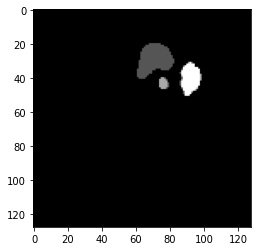

In [86]:
plt.imshow(All_masks[10],cmap='gray')

In [76]:
from keras.utils import normalize

In [79]:
imgs_normalized=normalize(imgs_axis_one)

In [80]:
imgs_normalized = np.expand_dims(imgs_normalized, axis=3)

In [81]:
imgs_normalized.shape

(9000, 128, 128, 1)

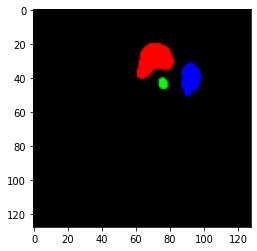

In [61]:
plt.imshow(masks1[10])

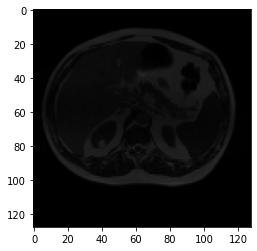

In [62]:
plt.imshow(all_images[10])
# plt.imshow(all_masks[0], alpha=0.2)

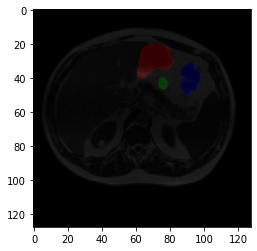

In [63]:
plt.imshow(all_images[10])
plt.imshow(all_masks[10], alpha=0.2)

In [87]:
from numpy import save
save('Final_images.npy', All_masks)

In [88]:
from numpy import save
save('Final_masks.npy', All_masks)

We saved our images and masks in the drive

In [89]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [91]:
!cp Final_images.npy '/content/gdrive/MyDrive/DL/DeepLearning_Project.ipynb/used_data'

In [92]:
!cp Final_masks.npy '/content/gdrive/MyDrive/DL/DeepLearning_Project.ipynb/used_data'